# Movie Data Analysis: Exploring Correlations
### Project Overview
The primary goal of this brief project was to gain practical experience in working with correlation. The project began with data cleaning and organization, and then progressed to explore and analyze correlations between various aspects of the dataset.


In [27]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from scipy.stats import pearsonr

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)

pd.options.mode.chained_assignment = None
pd.set_option("display.max_rows", 10) #Change the nr to None for unlimited display of records

In [2]:
df = pd.read_csv("DataSet/movies.csv")
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


## Data cleansing
### Checking for missing data 

In [3]:
#Check for any missing data 
missing_data_nr = len(df[df.isnull().any(axis=1)])
print(f"The number of the missing data on this dataset is: {missing_data_nr}")

#Checking mising values per each col
missing_per_col = df.isnull().sum() 
print("Missing value per each column:")
print(missing_per_col)

#Percentage of records missing for each column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
#     print('{} - {}%'.format(col,pct_missing))


#I plan to use budget for correlation and budget has most missing values, so I will drop all records with missing values 
#2247 missing values, from that, 2171 are on the budget column

df = df.dropna()

The number of the missing data on this dataset is: 2247
Missing value per each column:
name           0
rating        77
genre          0
year           0
released       2
            ... 
country        3
budget      2171
gross        189
company       17
runtime        4
Length: 15, dtype: int64


## I converted data types for columns like 'budget', 'gross', 'votes', and 'runtime' to integers to simplify the analysis.

In [4]:
df.dtypes
#Change unnesecary floats into int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')



## Extracted the correct year from the 'released' date to fix  inaccuracies in the "year" data column.

In [5]:
# Using regular expression to extract the year from the 'released' column since the recorded year is incorrect.
# The following code extracts a sequence of 4 numbers (representing the year).

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)




## Below I sorted the movies by their gross revenue to see which movies earned the most

In [6]:
# print(df.columns)

# Ordering the records acording to the gross value

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85,1982


##  Boxplots were used to visualize the spread and outliers in 'gross' and 'budget' data.

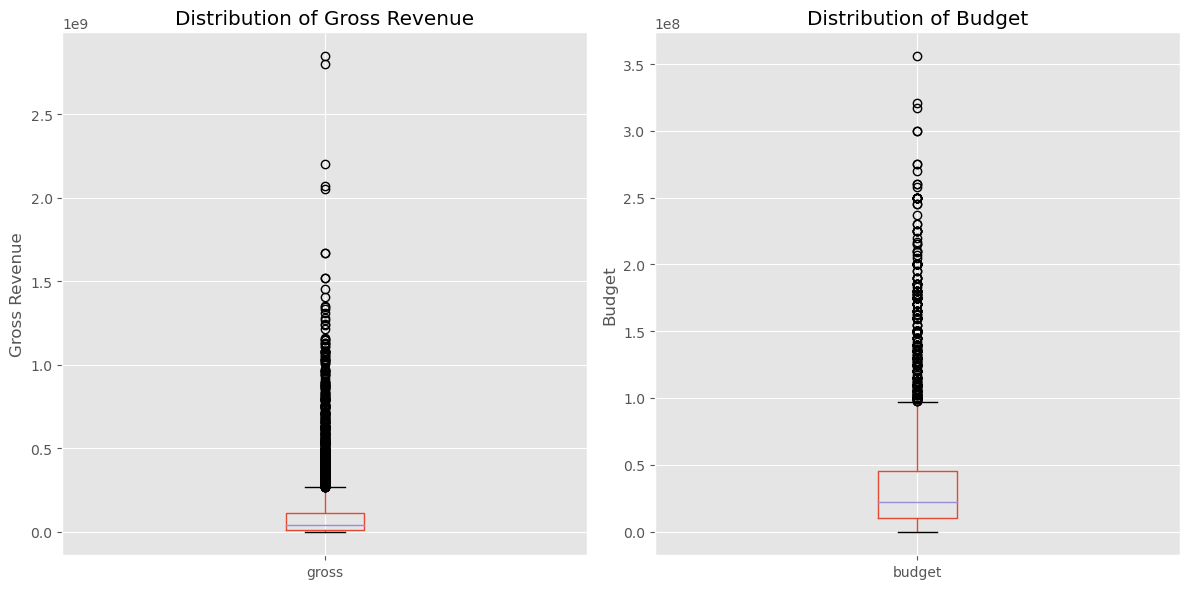

In [42]:
#Below we can see many outliers on the distribution of the gross and the budget 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot for 'gross'
df.boxplot(column=['gross'], ax=axes[0])
axes[0].set_title('Distribution of Gross Revenue')
axes[0].set_ylabel('Gross Revenue')

# Boxplot for 'budget'
df.boxplot(column=['budget'], ax=axes[1])
axes[1].set_title('Distribution of Budget')
axes[1].set_ylabel('Budget')

# Display the boxplots
plt.tight_layout()
plt.show()

- The interquartile range for movie revenues is narrow, showing that most movies earn similarly, with a few exceptional high earners.
- Both plots show outliers, but the gross revenue plot has outliers that are more extreme in comparison to the budget plot. This could imply that while movies may have high budgets, their revenues do not always respond proportionately.
- The fact that the gross revenue has more extreme outliers could also suggest that a few movie make a large portion of the total revenue in the dataset given
.

## Duplicate records were removed, ensuring each movie was uniquely represented, especially in terms of the production company

In [8]:
#Checking and drop  duplicates based on the company value 
df['company'].drop_duplicates().sort_values(ascending=True)



4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
2929                          1492 Pictures
385                        1818 Productions
                       ...                 
6420                                   erbp
6793                             i am OTHER
4007                               i5 Films
5664                            micro_scope
7129                                thefyzz
Name: company, Length: 1475, dtype: object

## Scatter plots were created to visually explore the relationship between movie budgets and gross revenue.

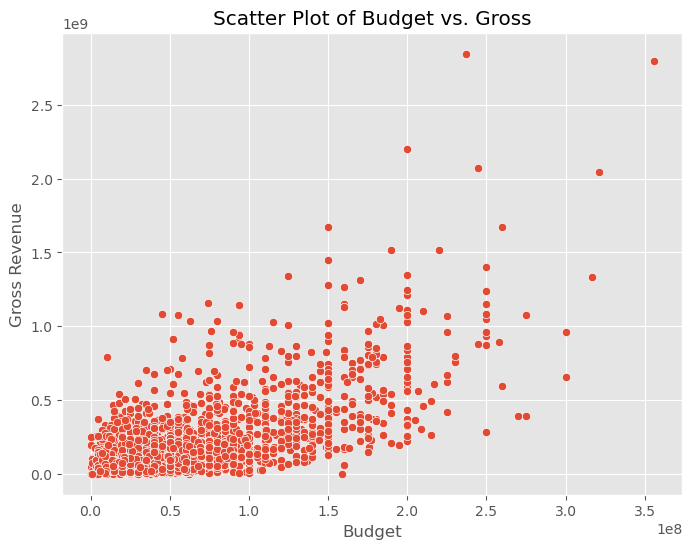

In [9]:
#Below I created a scatterplot of budget vs gross to check to check coorelation

plt.figure(figsize=(8,6))
# Create a scatter plot of budget vs. gross
sns.scatterplot(data=df, x='budget', y='gross')

# Add labels and a title
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.title('Scatter Plot of Budget vs. Gross')

# Show the plot
plt.show()


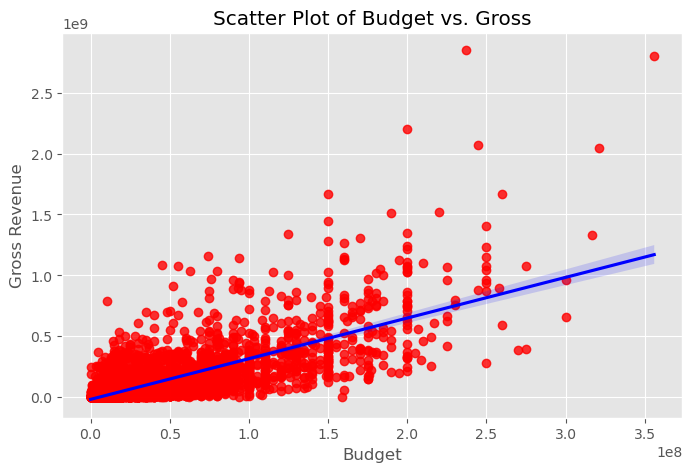

In [10]:
#Below I created a scatterplot of budget vs gross to check to check coorelation

plt.figure(figsize=(8,5))
# Create a scatter plot of budget vs. gross
sns.regplot( x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color" : "blue"})

# Add labels and a title
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.title('Scatter Plot of Budget vs. Gross')

# Show the plot
plt.show()


## A correlation matrix was computed for numerical features to identify significant relationships.

In [11]:
df = df.drop(columns="year")
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method="pearson") # default perseaon, kendall, spearman

correlation_matrix.head()

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294


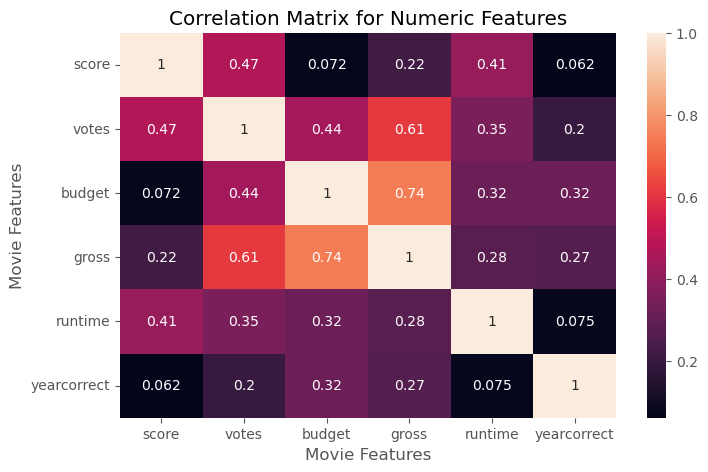

In [12]:


#High coorrelation between budget and gross
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [13]:
#Now we are going to look at company ,not numeric  but we can add an identifier(an ID)
df.head(2)


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980


## Categorical data were converted into numerical format to include these variables in the correlation analysis.

In [14]:
#QUICKER WAY 
# # The pandas factorize() function turns categories into unique numerical IDs. 
# df_numerized1 = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
# df_numerized1
# correlation_matrix_all = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
# sns.heatmap(correlation_matrix_all, annot = True)
# plt.title("Correlation matrix for Movies")
# plt.xlabel("Movie features")
# plt.ylabel("Movie features")
# plt.show()


df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'): #if the datatype is object we want to change to a categorical type (ID)
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,1980
1,3929,6,1,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,1980
2,3641,4,0,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,1980
3,204,4,4,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,1980
4,732,6,4,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98,1980


## A heatmap was utilized to visually represent the correlations between all features, including numeric and transformed categorical data.

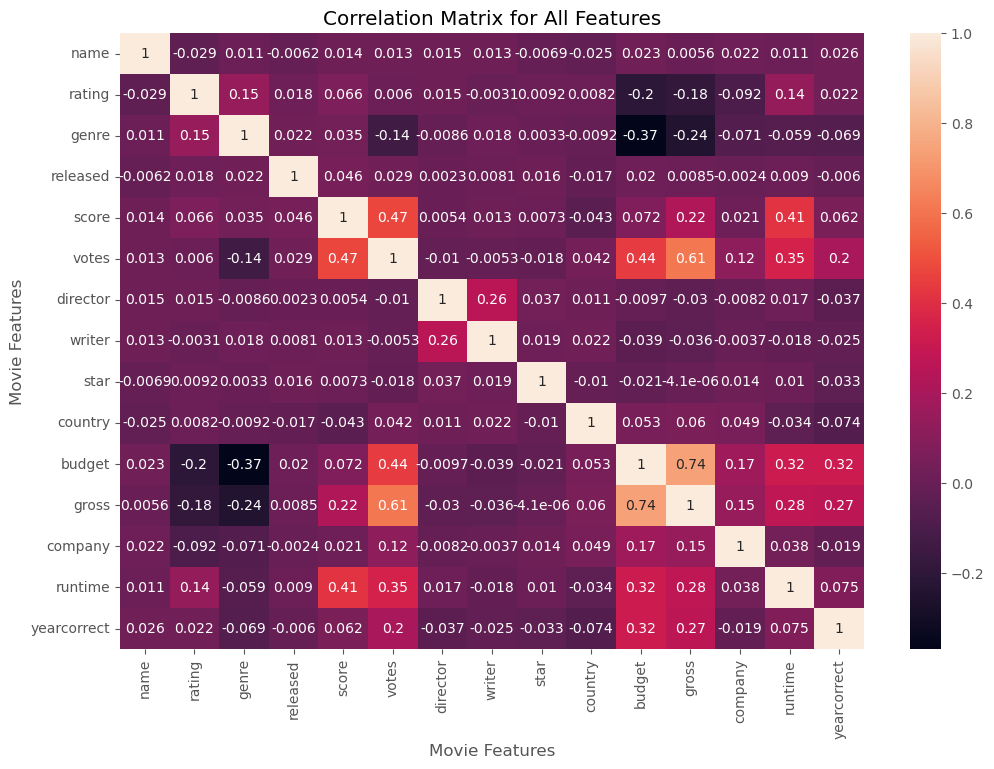

In [25]:
plt.figure(figsize=(12,8))
correlation_matrix1 = df_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix1, annot=True)
plt.title("Correlation Matrix for All Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

## In the last step, all the correlations were sorted to see which ones were the strongest.

In [19]:
pd.set_option("display.max_rows", None) #Change the nr to None for unlimited display of records

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_corr = corr_pairs.sort_values()
filtered_corr = sorted_corr[sorted_corr != 1]

sorted_corr = filtered_corr.sort_values(key=abs, ascending=False) 
sorted_corr.head(15)

gross    budget         0.740247
budget   gross          0.740247
gross    votes          0.614751
votes    gross          0.614751
score    votes          0.474256
votes    score          0.474256
         budget         0.439675
budget   votes          0.439675
runtime  score          0.414068
score    runtime        0.414068
genre    budget        -0.368523
budget   genre         -0.368523
votes    runtime        0.352303
runtime  votes          0.352303
budget   yearcorrect    0.320312
dtype: float64

- There is a strong positive correlation (0.74) between a movie's budget and its gross revenue.
- Additionally, movies with higher gross revenue tend to receive more votes (correlation of 0.61).
In simpler terms, when movies have larger budgets, they often earn more, and successful movies tend to attract more audience votes.

In [35]:
print("-----------------Correlation significance t-test of gross gros vs budget----------")

correlation_coefficient, p_value = pearsonr(df['budget'], df['gross'])
n = len(df['budget'])

# Calculating t-value
t_value = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient ** 2))

print("Correlation Coefficient:", correlation_coefficient)
print("T-value:", t_value)
print("P-value:", p_value)




-----------------Correlation significance t-test of gross gros vs budget----------
Correlation Coefficient: 0.740246543921963
T-value: 81.04941912381453
P-value: 0.0


In [38]:
print("-----------------Correlation significance t-test of  gross vs votes'----------")


correlation_coefficient, p_value = pearsonr(df['gross'], df['votes'])
n = len(df['gross'])

# Calculating t-value
t_value = correlation_coefficient * np.sqrt((n - 2) / (1 - correlation_coefficient ** 2))

print("Correlation Coefficient:", correlation_coefficient)
print("T-value:", t_value)
print("P-value:", p_value)


-----------------Correlation significance t-test of  gross vs votes'----------
Correlation Coefficient: 0.6147512368504806
T-value: 57.37669747433201
P-value: 0.0


- Having a p-value in both cases 0.0 ( clearly less than 0.05) we can be confident that the correlation is statically significant